**Little questions that I would have asked if we had an oral exam:**
(meaning that you shouldn't read or google or think for more than 5 seconds to answer them)

 - How do you create markdown cell in Jupyter? (with keyboard commands)
 - How do you add a cell above the current one in Jupyter (with keyboard command)? 
 - What does it mean that variables are dynamically typed in python?
 - What's the difference between python and Fortran integers?
 - Explain the difference between lists, sets and tuples in python.
 - What does negative index mean when accessing list elements?
 - How do you print the first N elements of a list?
 - How do you print every Nth element of a list?
 - How do you print the reverse list?
 - Give an example of a list comprehension.
 - Give an example of cell and line magic commands in Jupyter.
 - What are keyword function arguments in python and what is their advantage?
 - Why shouldn't you do from numpy import *?
 - What is the advantage of using numpy arrays over lists? What are the dangers?
 - What's the purpose of __str__ method in a python class?
 - How do you make "+" operator work for your class?
 - What package can you use in python for symbolic calculations?



### **Problem1:**

Write a function that calculates the first N [Fibonacci numbers](https://en.wikipedia.org/wiki/Fibonacci_number).

In [22]:
def fibonacci(n):
    if n <= 0:
        return 0 
    elif n == 1:
        return 1
    else:
        return fibonacci(n-1) + fibonacci (n-2)

[fibonacci(n) for n in range(15)]


### **Problem2:**

Generate random data for 2D points coordinates. Write a function that plots them with different colors for each 90 degree section with the origin in the center. This problem should be coded as a class, i.e. you should be able to execute the code:

```
pr=Problem2()
pr.generate()
pr.display()
```

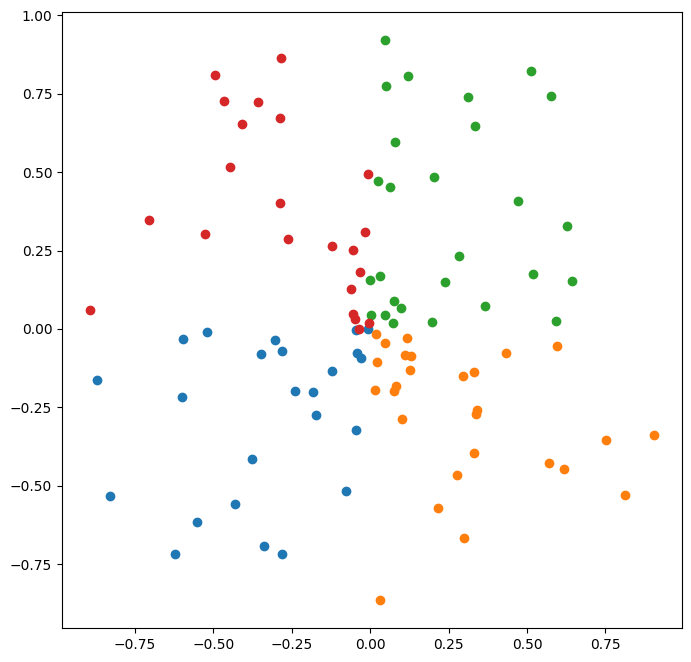

In [23]:
import matplotlib.pyplot as plt
import numpy as np

class Problem2:
    def __init__(self, num_points=100):
        self.num_points = num_points
        self.points = None

    def generate(self):
        np.random.seed(42)
        radius = np.random.rand(self.num_points)
        theta = np.random.rand(self.num_points) * 2 * np.pi

        self.points = np.column_stack((radius * np.cos(theta), radius * np.sin(theta)))

    def display(self):
        angles = np.arctan2(self.points[:, 1], self.points[:, 0])
        sections = np.floor((angles + np.pi) / (np.pi / 2))

        plt.figure(figsize=(8, 8))

        for section in np.unique(sections):
            mask = (sections == section)
            plt.scatter(self.points[mask, 0], self.points[mask, 1], label=f'Section {section}')

        plt.show()

pr = Problem2()
pr.generate()
pr.display()




### **Problem3:**

Write a decorator that calls a function twice.

In [24]:
def call_decorator(func):
    def wrapper(*args, **kwargs):
        result1 = func(*args, **kwargs)
        print(f"First call: {result1}")
        result2 = func(*args, **kwargs)
        print(f"Second call: {result2}")
    return wrapper

@call_decorator
def my_function(x):
    return x * 2

my_function(3)


First call: 6
Second call: 6


### **Problem4:**

Use sympy to solve the equation `d^2y(x)/dx^2 + 9y(x)+x=0`
Check that it's correct (still using sympy). Hint: you can access the right hand side of solution expression with `.rhs`.

Then set the constants equal to 1 and integrate the obtained function numerically using scipy over the interval [0,10]
Hint: you can use symply's lambdify function to turn sympy's expression into a function you can use later for scipy.


In [25]:
import sympy as sp
from scipy.integrate import quad
import numpy as np


x = sp.symbols('x')
y = sp.Function('y')
eq = sp.diff(y(x), x, x) + 9 * y(x) + x

solution = sp.dsolve(eq)
sp.init_printing(order='rev-lex')
print("Solution:")
sp.pprint(solution)

rhs_solution = solution.rhs
print("Right-hand side solution:")
sp.pprint(rhs_solution)

solution_with_constants = solution.subs('C1', 1).subs('C2', 1)
print("Solution with constants equal to 1:")
sp.pprint(solution_with_constants)

######################

numerical_solution = sp.lambdify(x, solution_with_constants.rhs, 'numpy')
interval = (0, 10)
result, error = quad(numerical_solution, *interval)

print("Numerical integration result:", result)
print("Integration error:", error)


Solution:
         x                            
y(x) = - ─ + C₂⋅cos(3⋅x) + C₁⋅sin(3⋅x)
         9                            
Right-hand side solution:
  x                            
- ─ + C₂⋅cos(3⋅x) + C₁⋅sin(3⋅x)
  9                            
Solution with constants equal to 1:
                             x
y(x) = cos(3⋅x) + sin(3⋅x) - ─
                             9
Numerical integration result: -5.602983246882369
Integration error: 1.1617232355643577e-13


### **Problem5:**
(advanced, would be given as a project to do at home and explain at the oral exam)

**Solving Laplace equation by Jacobi method**

The algorithm used in this problem solves Laplace’s equation on an evenly spaced grid through the use of a simple Jacobi iteration technique. The equation is a partial differential equation named after Pierre-Simon Laplace and are important in many fields of science: namely the fields of electromagnetism, astronomy and fluid dynamics. 

The equation has the form: 

```
d^2f/dx^2 + d^2f/dy^2=0
```

**The Algorithm (implement this as a class)**

 - create a numpy array to store 2 dimensional grid.

 -  Setup the initial constant boundary conditions in the following way:
     - the value at the lower left hand corner of the of the grid is 100, 
     - the value ascending and to the right is set to a linear gradient reaching zero at the opposite corners (see Figure1). The rest of the borders are fixed at zero. Please note, that these boundaries remain constant throughout the simulation.

 - Setup the initial condition of the inner grid elements as 0.5.

-  Write a jacobi method. At each iteration, the value of each inner matrix element needs to be recomputed from elements of the current iteration (in a similar way to how we did with game of life). The updating formula, based on numerical computation of second derivatives, is:

```
new_field[i,j]=0.25*(field[i,j-1]+field[i,j+1]+field[i+1,j]+field[i-1,j])
```

![](jacobiFigure1.jpg)

Use `imshow` to plot the result. There is a `jacobi.gif` file uploaded that shows how the solution looks like. Making gifs in python is troublesome, so just the final picuture would be enough.

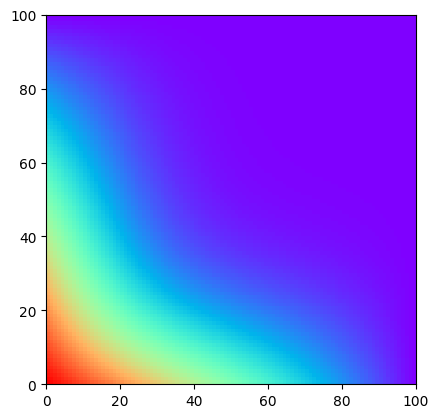

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

class LaplaceSolver:
    def __init__(self, size, iterations):
        self.size = size
        self.iterations = iterations
        self.field = np.zeros((size, size), dtype=float)

        self.field[0, 0] = 100
        gradient = np.linspace(100, 0, size)
        self.field[0, :] = gradient
        self.field[:, 0] = gradient

    def jacobi_iteration(self):
        
        new_field = np.copy(self.field)

        new_field[1:-1, 1:-1] = 0.25 * (
            self.field[1:-1, :-2] +
            self.field[1:-1, 2:] +
            self.field[:-2, 1:-1] +
            self.field[2:, 1:-1]
        )

        self.field = new_field

    def solve(self):
        frames = [np.copy(self.field)]
        for _ in range(self.iterations):
            self.jacobi_iteration()
            frames.append(np.copy(self.field))
        return frames

grid_size = 100
num_iterations = 1000

# create and solve Laplace's equation using Jacobi method
laplace_solver = LaplaceSolver(grid_size, num_iterations)
frames = laplace_solver.solve()

# Create a GIF
fig, ax = plt.subplots()

def update(frame):
    ax.clear()
    ax.imshow(frame, cmap='rainbow', origin='lower', extent=[0, grid_size, 0, grid_size])
    #ax.set_title(f'Iteration {frame}')

animation = FuncAnimation(fig, update, frames=frames, interval=100, repeat=False)
animation.save('laplace_solution2.gif', writer='pillow')

plt.show()
